#### Image Classification With Convolutional Neural Network (CNNs)


In [ ]:
import tensorflow as tf

In [ ]:
cifar10= tf.keras.datasets.cifar10

In [ ]:
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()

In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
# Printing the shapes of the loaded data
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


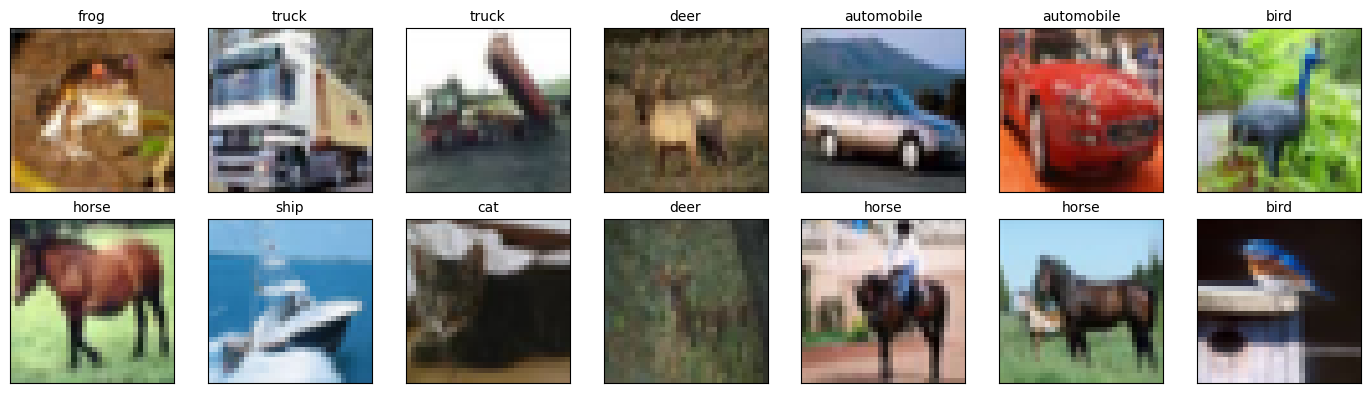

In [ ]:
import matplotlib.pyplot as plt
# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Create a new figure with smaller size
plt.figure(figsize=(14, 4))
# Loop over the first 14 images
for i in range(14):
    # Create a subplot for each image
    plt.subplot(2, 7, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Display the image
    plt.imshow(x_train[i])
    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=10)
# Adjust spacing between subplots
plt.tight_layout()
# Display the figure
plt.show()

In [ ]:
from tensorflow.keras.layers import Input , Conv2D , Dense , Flatten , Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

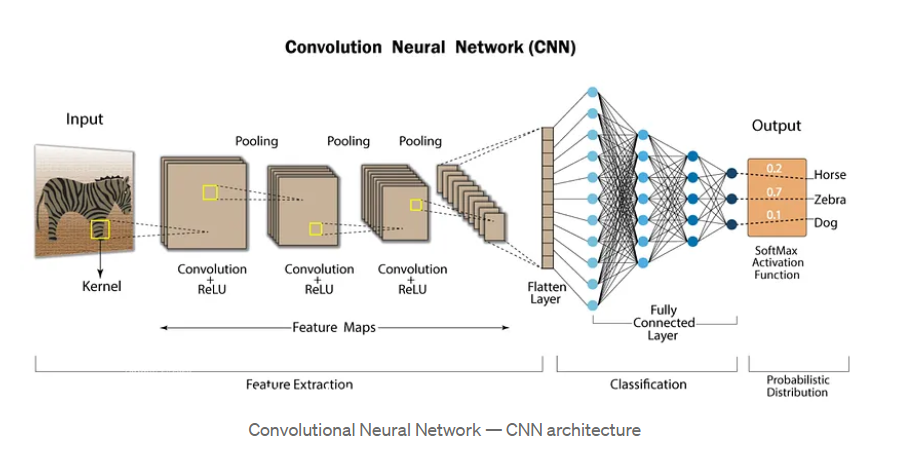

Input Layer

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
input = Input(shape=x_train[0].shape)

Convolutional Layer

In [ ]:
x = Conv2D(32,(3,3),activation='relu',padding='same')(input)
x = BatchNormalization()(x)

x = Conv2D(32,(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

Max-Pooling Layer

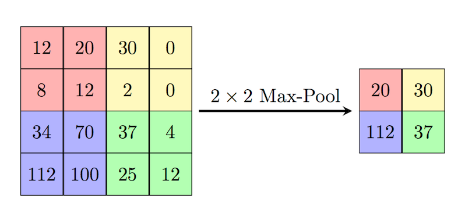

In [ ]:
x = MaxPooling2D((2,2))(x)

Again - Convolutional Layer

In [ ]:
x = Conv2D(64,(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128,(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

Flatten the output for dense layers

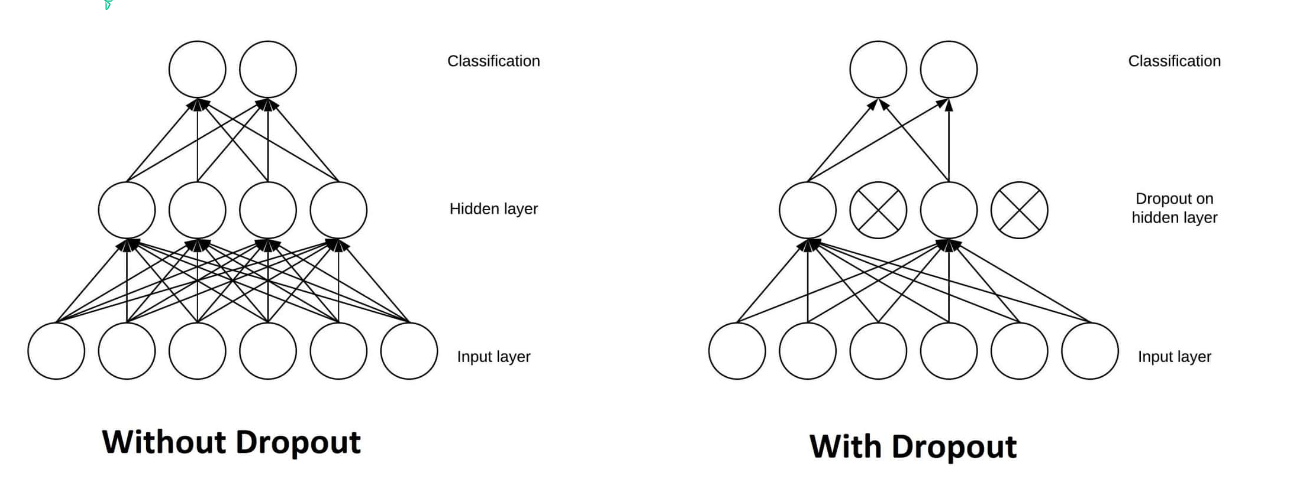

In [ ]:
x = Flatten()(x)
x = Dropout(0.2)(x)

Adding one hidden layer

In [ ]:
x = Dense(1024 , activation='relu')(x)
x = Dropout(0.2)(x)

Output layer

In [ ]:
x = Dense(10, activation='softmax')(x)

In [ ]:
model = Model(input , x)

Model Summary

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0     

Model Compile

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model Training

batch size=32 train imgs = 50,000 / 32 = 1563

In [ ]:
cnn_model = model.fit(
    x_train,y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test,y_test)
)

Epoch 1/10
1563/1563 [==============================] - 22s 9ms/step - loss: 1.3124 - accuracy: 0.5481 - val_loss: 0.9997 - val_accuracy: 0.6535
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8495 - accuracy: 0.7043 - val_loss: 0.7485 - val_accuracy: 0.7444
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6955 - accuracy: 0.7610 - val_loss: 0.8304 - val_accuracy: 0.7215
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5811 - accuracy: 0.8024 - val_loss: 0.7310 - val_accuracy: 0.7499
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4932 - accuracy: 0.8312 - val_loss: 0.8696 - val_accuracy: 0.7255
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4187 - accuracy: 0.8549 - val_loss: 0.5949 - val_accuracy: 0.8066
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3550 - accuracy: 0.8774 - val_loss: 0.6989 - val_ac

In [ ]:
# Evaluate the model
results = model.evaluate(x_test, y_test)

# Unpack the results
test_loss = results[0]
test_accuracy = results[1]
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.6046 - accuracy: 0.8230
Test Accuracy: 0.8230000138282776
Test Loss: 0.6046313047409058


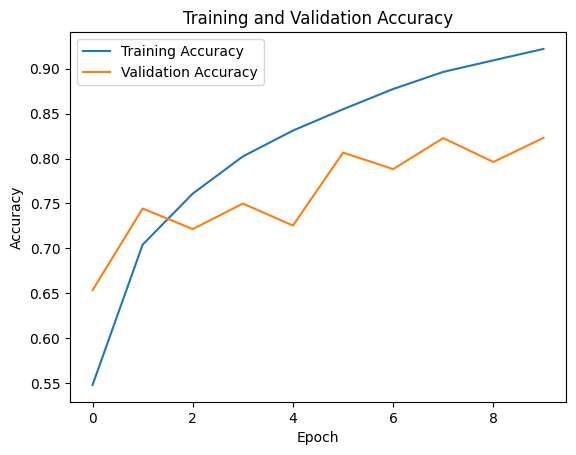

In [ ]:
# Plot training and validation accuracy
plt.plot(cnn_model.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

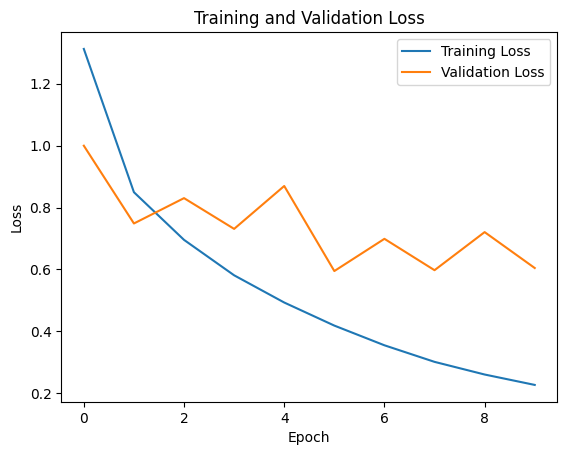

In [ ]:
plt.plot(cnn_model.history['loss'], label='Training Loss')
plt.plot(cnn_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)#ratio of correctly classified samples to the total number of samples in the dataset.
print("Precision:", precision)#proportion of true positive predictions out of all positive predictions
print("Recall:", recall)#proportion of true positive predictions out of all actual positive instances
print("F1-score:", f1)#harmonic mean of precison and recall

313/313 [==============================] - 1s 4ms/step
Accuracy: 0.823
Precision: 0.8253074617704212
Recall: 0.823
F1-score: 0.8237773275802772


Confusion Matrix:
[[845   7  53  18  15   4   4   8  38   8]
 [ 16 919   2   1   2   5   3   0  12  40]
 [ 51   1 769  35  39  51  31  10   9   4]
 [ 15   4  61 696  42 102  30  31  12   7]
 [ 15   3  59  60 775  30  24  29   5   0]
 [  6   5  40 132  28 754   8  21   5   1]
 [  7   1  46  58  15  19 838   6  10   0]
 [ 10   2  12  30  34  38   4 864   3   3]
 [ 49  12   9   4   2   3   2   1 908  10]
 [ 39  48   5  10   2   4   2   8  20 862]]


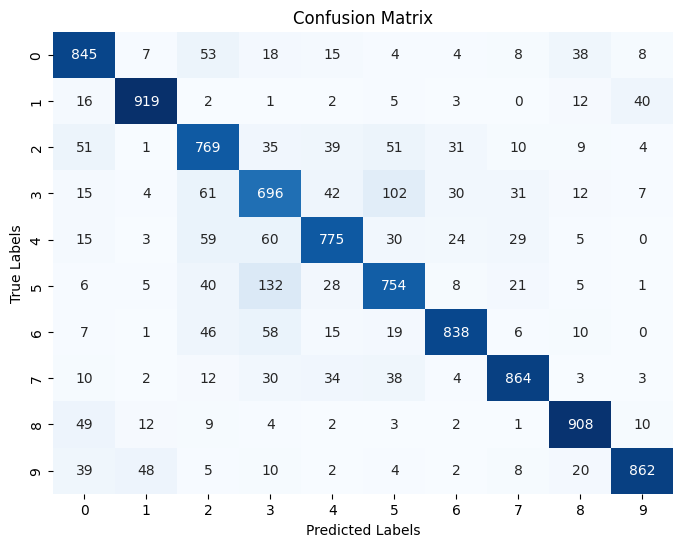

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

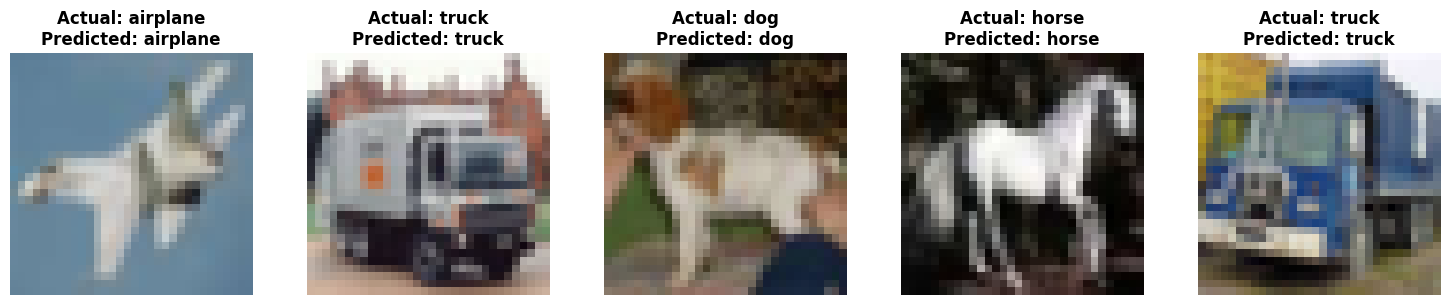

In [ ]:
plt.figure(figsize=(15, 3))
for i in range(10, 15):
    plt.subplot(1, 5, i - 9)  # Adjust subplot indexing
    plt.imshow(x_test[i])
    plt.title(f"Actual: {class_names[y_test[i][0]]}\nPredicted: {class_names[y_pred[i]]}", fontsize=12, fontweight='bold')
    plt.axis('off')
plt.tight_layout()
plt.show()